In [1]:
import matplotlib.pyplot as plt
import os
from typing import List, Tuple
import csv
from scratch.linear_algebra import Vector, get_column

ModuleNotFoundError: No module named 'scratch.linear_algebra'

## 1. 데이터셋

###  1.1 데이터셋 다운로드

In [2]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np

data_path = '/Users/jh.yun/Desktop/target_data'
os.chdir(data_path)
data_list=os.listdir()

vals1 =[]
vals2=[]
vals2_label=[]
vals3= []
vals4=[]
vals5=[]
vals6=[]
inputs=[]

for i in data_list:
    with open(i, "r", encoding='utf8')as f:
        data=f.read()
        data=data.rstrip()
        temp=data.split('-')
        vals1.append(float(temp[0]))
        vals2.append(float(temp[1]))
        vals3.append(float(temp[2]))
        vals4.append(float(temp[3]))
        vals5.append(float(temp[4]))
        vals6.append(float(temp[5]))
        if(float(temp[1])>0.052415):
            vals2_label.append("B")
        elif(float(temp[1]<=0.052415)):
            vals2_label.append("S")
        
        inputs.append(temp)

        
df = DataFrame (inputs,columns=['vals1','vals2','vals3','vals4','vals5','vals6'])
df["vals2_label"] = vals2_label
print (df)
data_list = df.values.tolist()

                  vals1               vals2               vals3  \
0     2.894725928057302  0.6708333333333335   2.289689970660691   
1    3.0335995549567043  1.1198130289666666  3.0074748871231725   
2    2.9292997395392546  0.7874333699533319  2.9100574429323496   
3    2.9935663686343608  0.8613616943266625   3.037824637014039   
4    3.0179503600621347  1.2780710856133377  2.9725249219893657   
..                  ...                 ...                 ...   
723  2.8979354714826866  0.9403147379466702  2.9174315569663585   
724   2.922804907569886  1.0359283447399965  2.8967214023993586   
725  2.9513865393907297  0.7536402384199988  2.8939121684932023   
726   2.960022425564191   1.210233561199997   3.048391297172775   
727  2.9358192385845703  1.2522755940666666  2.9414239180277986   

                  vals4               vals5               vals6 vals2_label  
0    0.8498487576465297   2.569539866352771  2.0036292101520243           B  
1    0.6296498145918343   2.67796220967

### 1.2 데이터 파싱

In [3]:
def parse_row(row: List[str]) -> Tuple[Vector, int]:
    measurements = [float(value) for value in row[:6]]
    label = row[-1]
    label = 1 if label == 'B' else 0
    return measurements, label

NameError: name 'Vector' is not defined

### 1.3 데이터 읽기

In [4]:
X_vals2 : List[Vector] = []
y_vals2 : List[int] = []
for row in data_list:
    x, y = parse_row(row)
    X_vals2.append(x)
    y_vals2.append(y)

NameError: name 'Vector' is not defined

In [5]:
print(X_vals2[0])
print(y_vals2[0])

IndexError: list index out of range

#### 1.4 데이터 컬럼명

In [6]:
columns = [
    "vals1", "vals2", "vals3", "vals4", "vals5", 
    "vals6",]

## 2. 데이터 탐색

### 2.1 클래스 비율 확인

In [7]:

from collections import defaultdict
label_type = defaultdict(int)
for y in y_cancer:
    label = 'B' if y == 1 else 'S'
    label_type[label] += 1

NameError: name 'y_cancer' is not defined

<ipython-input-8-bc82b9fd6221>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  pies = plt.pie(label_type.values(),
No handles with labels found to put in legend.


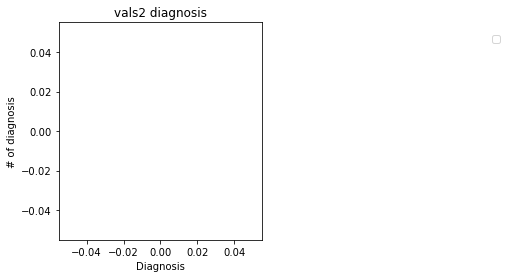

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.bar(label_type.keys(),
        label_type.values(),
        0.5,
        facecolor="#2E495E",
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.xlabel("Diagnosis")
plt.ylabel("# of diagnosis")
plt.title("vals2 diagnosis")

plt.subplot(1, 2, 2)
pies = plt.pie(label_type.values(),
               labels=label_type.keys(),
               startangle=90)
plt.legend()
plt.show()

## 3. 데이터 전처리

### 3.1 데이터셋 분리

#### 입력 데이터에 상수 항에 대한 입력 1 추가

In [9]:
X_vals2 = [[1.0] + row for row in  X_vals2]

In [10]:
import random
from scratch.machine_learning import train_test_split

random.seed(12)
X_train, X_test, y_train, y_test = train_test_split(X_vals2, y_vals2, 0.25)
print('train dataset :', len(X_train))
print('test dataset :', len(X_test))
print(X_train)

ModuleNotFoundError: No module named 'scratch.machine_learning'

### 3.2 데이터 표준화 (Standardization) (Q1)
훈련 데이터의 평균과 표준 편차로 테스트 데이터를 표준화 하도록 normalization() 함수를 작성해 보시오.

In [11]:
#from scratch.working_with_data import scale, rescale
from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation
def normalization(data: List[Vector],
                  means : Vector = None,
                  stdevs : Vector = None) -> List[Vector]:
    
    dim=len(data[0])
    means=vector_mean(data)
    stdevs=[standard_deviation([vector[i] for vector in data]) for i in range(dim)]
#    if (means==None or stdevs ==None):
 #       means, stdevs = scale(data)
    
    rescaled = [v[:] for v in data]
    
    for v in rescaled:
        for i in range(dim):
            if stdevs[i]>0:
                v[i]=(v[i]-means[i]) / stdevs[i]
    
    return rescaled, means, stdevs

ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [12]:
len(X_train[0])

NameError: name 'X_train' is not defined

In [13]:

X_train_normed, X_train_means, X_train_stdevs = normalization(X_train)
X_test_normed, _, _  = normalization(X_test, X_train_means, X_train_stdevs)

NameError: name 'normalization' is not defined

## 4. 로지스틱 회귀

In [14]:

from matplotlib import pyplot as plt

def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)


In [15]:

from typing import List
import math
from scratch.linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """The negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))
    
def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta)
               for x, y in zip(xs, ys))

ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [16]:

from scratch.linear_algebra import vector_sum

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    return [_negative_log_partial_j(x, y, beta, j)
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [17]:
import random
import tqdm
import IPython.display as display
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step

def minibatches(xs: List[Vector], batch_size=20):
    for start in range(0, len(xs), batch_size):
        batch_xs=xs[start:start+batch_size]
        batch_ys=ys[start:start+batch_size]
    return batch_xs, batch_ys

def logistic_regression(xs: List[Vector],
                        ys: List[float],
                        learning_rate: float = 0.001,
                        num_steps: int = 1000,
                        batch_size: int = 1) -> Vector:
    # your code
    
    # pick a random starting point
    beta = [random.random() for _ in range(7)]
 
    history=[]
    
    with tqdm.trange(5000) as t:
        for epoch in t:
            for batch in minibatches(xs, batch_size=20):
                gradient = negative_log_gradient(xs, ys, beta)
                beta = gradient_step(beta, gradient, -learning_rate)
                loss = negative_log_likelihood(xs, ys, beta)
                t.set_description(f"loss: {loss:.3f} beta: {beta}")
                history.append(loss)
            if epoch and epoch % 100 ==0:
                display.clear_output(wait=True)
                plt.plot(history)
                plt.show()
    
    return beta
    


ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [18]:
print(len(X_train_normed),len(y_train))


NameError: name 'X_train_normed' is not defined

In [19]:
beta = logistic_regression(X_train_normed, y_train)

NameError: name 'logistic_regression' is not defined

#### 𝜷 확인

In [20]:
plt.plot(beta)
plt.show()

NameError: name 'beta' is not defined

모델 테스트 

In [137]:

true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(X_test_normed, y_test):
    prediction = logistic(dot(beta, x_i))

    if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid
        true_positives += 1
    elif y_i == 1:                      # FN: paid and we predict unpaid
        false_negatives += 1
    elif prediction >= 0.5:             # FP: unpaid and we predict paid
        false_positives += 1
    else:                               # TN: unpaid and we predict unpaid
        true_negatives += 1
        
TP = true_positives
FN = false_negatives
FP = false_positives
TN = true_negatives

confusion_matrix=[[TP,FP],[FN,TN]]

모델 성능

In [138]:
from scratch.machine_learning import accuracy, precision, recall, f1_score

print(confusion_matrix)
print("accuracy :", accuracy(TP, FP, FN, TN))
print("precision :", precision(TP, FP, FN, TN))
print("recall :", recall(TP, FP, FN, TN))
print("f1_score :", f1_score(TP, FP, FN, TN))

[[182, 0], [0, 0]]
accuracy : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0


In [2]:
predictions = [logistic(dot(beta, x)) for x in X_test_normed]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

NameError: name 'X_test_normed' is not defined